# Data Collection and Preprocessing

In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 596 kB 12.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
targets = new_client.target
target_query = targets.search('Dengue')
nam = 'NS3'
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,15.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,13.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,13.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,13.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,11.0,False,CHEMBL613728,[],ORGANISM,11070
5,"[{'xref_id': 'P29990', 'xref_name': None, 'xre...",Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,9.0,False,CHEMBL5980,"[{'accession': 'P29990', 'component_descriptio...",SINGLE PROTEIN,31634


In [5]:
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL5980'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [9]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1401841,None,CHEMBL1401841,None,False,http://www.openphacts.org/units/Nanomolar,1128177,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1608853,None,CHEMBL1608853,None,False,http://www.openphacts.org/units/Nanomolar,1125996,None,7,True,None,None,IC50,nM,None,12310.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1429799,None,CHEMBL1429799,None,False,http://www.openphacts.org/units/Nanomolar,1020363,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL246446,None,CHEMBL246446,None,False,http://www.openphacts.org/units/Nanomolar,1107548,None,7,True,None,None,IC50,nM,None,50970.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1383455,None,CHEMBL1383455,None,False,http://www.openphacts.org/units/Nanomolar,1037080,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,None,None,CHEMBL4619777,J Med Chem,2020.0,"{'bei': '9.85', 'le': '0.18', 'lle': '-0.06', ...",CHEMBL4640021,None,CHEMBL4650912,5.89,False,http://www.openphacts.org/units/Nanomolar,3481564,=,1,True,=,None,IC50,nM,None,1300.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCC(=O)N[C@@H](C

In [32]:
df.to_csv(nam + '_01_bioactivity_data_raw.csv', index=False)

In [13]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1401841,None,CHEMBL1401841,None,False,http://www.openphacts.org/units/Nanomolar,1128177,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1608853,None,CHEMBL1608853,None,False,http://www.openphacts.org/units/Nanomolar,1125996,None,7,True,None,None,IC50,nM,None,12310.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1429799,None,CHEMBL1429799,None,False,http://www.openphacts.org/units/Nanomolar,1020363,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL246446,None,CHEMBL246446,None,False,http://www.openphacts.org/units/Nanomolar,1107548,None,7,True,None,None,IC50,nM,None,50970.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1383455,None,CHEMBL1383455,None,False,http://www.openphacts.org/units/Nanomolar,1037080,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,None,None,CHEMBL4619777,J Med Chem,2020.0,"{'bei': '9.85', 'le': '0.18', 'lle': '-0.06', ...",CHEMBL4640021,None,CHEMBL4650912,5.89,False,http://www.openphacts.org/units/Nanomolar,3481564,=,1,True,=,None,IC50,nM,None,1300.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCC(=O)N[C@@H](C

In [15]:
len(df2.canonical_smiles.unique())

1085

In [16]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1401841,None,CHEMBL1401841,None,False,http://www.openphacts.org/units/Nanomolar,1128177,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1608853,None,CHEMBL1608853,None,False,http://www.openphacts.org/units/Nanomolar,1125996,None,7,True,None,None,IC50,nM,None,12310.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1429799,None,CHEMBL1429799,None,False,http://www.openphacts.org/units/Nanomolar,1020363,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL246446,None,CHEMBL246446,None,False,http://www.openphacts.org/units/Nanomolar,1107548,None,7,True,None,None,IC50,nM,None,50970.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1383455,None,CHEMBL1383455,None,False,http://www.openphacts.org/units/Nanomolar,1037080,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,None,None,CHEMBL4619777,J Med Chem,2020.0,"{'bei': '9.85', 'le': '0.18', 'lle': '-0.06', ...",CHEMBL4640021,None,CHEMBL4650912,5.89,False,http://www.openphacts.org/units/Nanomolar,3481564,=,1,True,=,None,IC50,nM,None,1300.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCC(=O)N[C@@H](C

In [17]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0
...,...,...,...
1136,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0
1137,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0
1138,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0
1139,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0


In [18]:
df3.to_csv(nam + '_02_bioactivity_data_preprocessed.csv', index=False)

In [19]:
df4 = pd.read_csv(nam + '_02_bioactivity_data_preprocessed.csv')

In [20]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append('Inactive')
  elif float(i) <= 1000:
    bioactivity_threshold.append('active')
  else:
    bioactivity_threshold.append('Intermediate')

In [21]:
bioactivity_class = pd.Series(bioactivity_threshold, name="class")
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,Inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,Inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,Inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,Inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,Inactive
...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,Intermediate
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,Intermediate
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,Intermediate
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active


In [26]:
df5.to_csv(nam + '_03_bioactivity_data_curated_csv', index=False)

In [33]:
! zip NS3.zip *.csv

updating:  NS3_01_bioactivity_data_raw.csv (deflated 92%)
updating: NS3_02_bioactivity_data_preprocessed.csv (deflated 74%)
  adding: NS3_01_bioactivity_data_raw.csv (deflated 92%)


In [34]:
! ls -l

total 1664
-rw-r--r-- 1 root root 695094 Jan 12 05:51 ' NS3_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root 690498 Jan 12 05:52  NS3_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  82977 Jan 12 05:46  NS3_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  93136 Jan 12 05:51  NS3_03_bioactivity_data_curated_csv
-rw-r--r-- 1 root root 129086 Jan 12 05:52  NS3.zip
drwxr-xr-x 1 root root   4096 Jan  7 14:33  sample_data


# Exploratory Data Analysis

In [35]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-01-12 05:55:00--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   210MB/s    in 0.4s    

2022-01-12 05:55:00 (210 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv(nam + '_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,Inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,Inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,Inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,Inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,Inactive
...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,Intermediate
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,Intermediate
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,Intermediate
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active


In [38]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [40]:
smiles = []
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [61]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1401841,100000.0,Inactive,COc1ccc2nc3cccc(OC)c3nc2c1
1,CHEMBL1608853,12310.0,Inactive,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O
2,CHEMBL1429799,100000.0,Inactive,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...
3,CHEMBL246446,50970.0,Inactive,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1
4,CHEMBL1383455,100000.0,Inactive,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...
...,...,...,...,...
1080,CHEMBL4640021,1300.0,Intermediate,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...
1081,CHEMBL4642885,3100.0,Intermediate,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...
1082,CHEMBL4636584,2500.0,Intermediate,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...
1083,CHEMBL4633312,540.0,active,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...


Calculate Lipinski Descriptors

In [57]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [65]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [66]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1080,597.719,5.95437,5.0,4.0
1081,542.507,6.08510,3.0,4.0
1082,682.608,7.13527,5.0,5.0
1083,666.609,7.26117,5.0,4.0


In [69]:
df_combined = pd.concat([df,df_lipinski],axis=1)

In [70]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,Inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,Inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,Inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,Inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,Inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,Intermediate,597.719,5.95437,5.0,4.0
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,Intermediate,542.507,6.08510,3.0,4.0
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,Intermediate,682.608,7.13527,5.0,5.0
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active,666.609,7.26117,5.0,4.0


Convert IC50 to pIC50

In [71]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [72]:
df_combined.standard_value.describe()

count      1085.000000
mean      50263.244240
std       31041.570728
min         400.000000
25%       26280.000000
50%       43420.000000
75%       75370.000000
max      121900.000000
Name: standard_value, dtype: float64

In [73]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [74]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,Inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,Inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,Inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,Inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,Inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,Intermediate,597.719,5.95437,5.0,4.0,1300.0
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,Intermediate,542.507,6.08510,3.0,4.0,3100.0
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,Intermediate,682.608,7.13527,5.0,5.0,2500.0
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,540.0


In [75]:
df_norm.standard_value_norm.describe()

count      1085.000000
mean      50263.244240
std       31041.570728
min         400.000000
25%       26280.000000
50%       43420.000000
75%       75370.000000
max      121900.000000
Name: standard_value_norm, dtype: float64

In [76]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,Inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,Inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,Inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,Inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,Inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,Intermediate,597.719,5.95437,5.0,4.0,5.886057
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,Intermediate,542.507,6.08510,3.0,4.0,5.508638
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,Intermediate,682.608,7.13527,5.0,5.0,5.602060
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,6.267606


In [77]:
df_final.pIC50.describe()

count    1085.000000
mean        4.426007
std         0.398209
min         3.913996
25%         4.122801
50%         4.362310
75%         4.580375
max         6.397940
Name: pIC50, dtype: float64

In [78]:
df_final.to_csv(nam+'_04_bioactivity_data_3class_pIC50.csv')

In [82]:
df_2class = df_final[df_final['class'] != 'Intermediate'] #imp
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,Inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,Inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,Inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,Inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,Inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1060,CHEMBL3335490,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,Inactive,462.555,-1.73643,8.0,6.0,4.638272
1063,CHEMBL4635643,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(NC(=N)N)cc1)c1cc...,Inactive,526.641,4.49665,5.0,5.0,4.397940
1066,CHEMBL4638581,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(NC(=N)N)cc1)c1cc...,Inactive,557.739,5.92247,5.0,4.0,4.886057
1079,CHEMBL4642710,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)c2ccccc2-c2cc...,Inactive,583.692,6.02547,5.0,4.0,4.619789


In [83]:
df_2class.to_csv( nam +'_05_bioactivity_data_2class_pIC50.csv')

Lipinki Descriptors

In [84]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

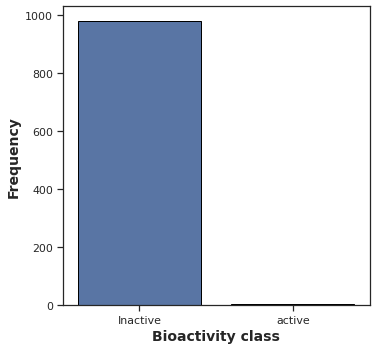

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

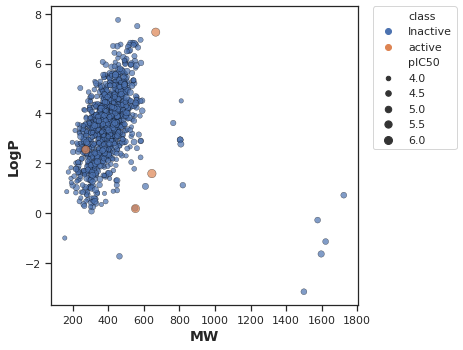

In [88]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

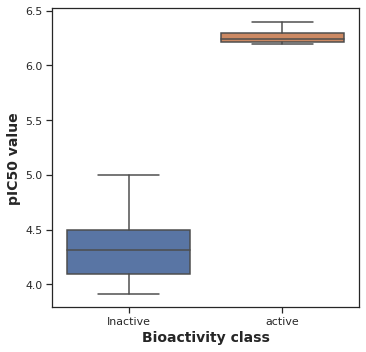

In [89]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [90]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [91]:
mannwhitney('pIC50')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


MW


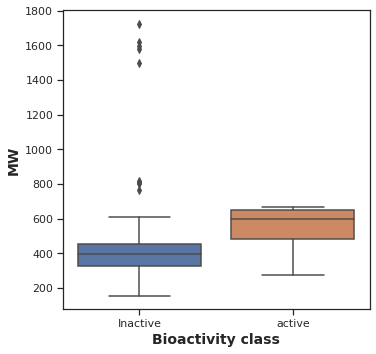

In [92]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [93]:
mannwhitney('MW')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.0,0.05,Different distribution (reject H0)


LogP

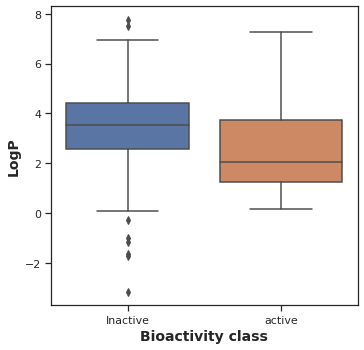

In [94]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [95]:
mannwhitney('LogP')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,0.0,0.0,0.05,Different distribution (reject H0)


NumHDonors


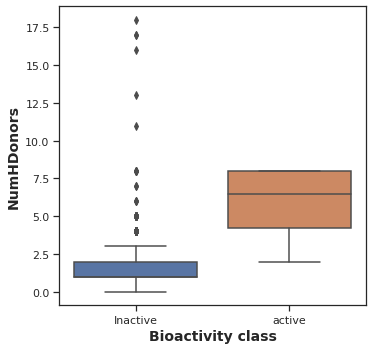

In [96]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [97]:
mannwhitney('NumHDonors')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.0,0.05,Different distribution (reject H0)


NumHAcceptors

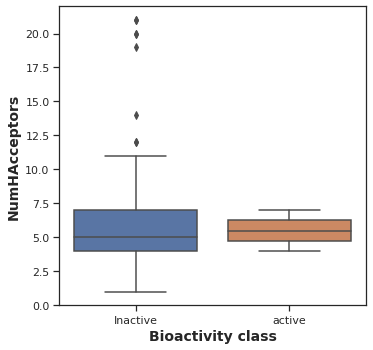

In [98]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [99]:
mannwhitney('NumHAcceptors')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.0,0.05,Different distribution (reject H0)


In [100]:
! zip -r results.zip . -i *.csv *.pdf

  adding: NS3_01_bioactivity_data_raw.csv (deflated 92%)
  adding: mannwhitneyu_pIC50.csv (deflated 14%)
  adding: mannwhitneyu_MW.csv (deflated 11%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 13%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 13%)
  adding: mannwhitneyu_LogP.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: NS3_04_bioactivity_data_3class_pIC50.csv (deflated 70%)
  adding: NS3_03_bioactivity_data_curated.csv (deflated 76%)
  adding: NS3_05_bioactivity_data_2class_pIC50.csv (deflated 70%)
  adding: NS3_02_bioactivity_data_preprocessed.csv (deflated 74%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)


#Descriptor Calculation and Dataset Preparation

In [101]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-01-12 06:39:38--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-01-12 06:39:38--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   130MB/s    in 0.2s    

2022-01-12 06:39:40 (130 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-01-12 06:39:40--  https://github

In [102]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [103]:
import pandas as pd

In [104]:
df3 = pd.read_csv(nam + '_04_bioactivity_data_3class_pIC50.csv')

In [105]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,Inactive,240.262,2.80020,0.0,4.0,4.000000
1,1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,Inactive,268.224,2.44040,1.0,4.0,4.909742
2,2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,Inactive,407.426,1.38560,1.0,5.0,4.000000
3,3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,Inactive,306.277,3.84800,1.0,5.0,4.292685
4,4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,Inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...,...
1080,1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,Intermediate,597.719,5.95437,5.0,4.0,5.886057
1081,1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,Intermediate,542.507,6.08510,3.0,4.0,5.508638
1082,1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,Intermediate,682.608,7.13527,5.0,5.0,5.602060
1083,1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,6.267606


In [106]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [107]:
! cat molecule.smi | head -5

COc1ccc2nc3cccc(OC)c3nc2c1	CHEMBL1401841
O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O	CHEMBL1608853
O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CCOCC1	CHEMBL1429799
O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1	CHEMBL246446
CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(Cl)c1=O	CHEMBL1383455


In [108]:
! cat molecule.smi | wc -l

1085


Calculate fingerprint descriptors

In [109]:
! bash padel.sh

Processing CHEMBL1401841 in molecule.smi (1/1085). 
Processing CHEMBL1608853 in molecule.smi (2/1085). 
Processing CHEMBL1429799 in molecule.smi (3/1085). Average speed: 3.25 s/mol.
Processing CHEMBL246446 in molecule.smi (4/1085). Average speed: 1.70 s/mol.
Processing CHEMBL1383455 in molecule.smi (5/1085). Average speed: 1.62 s/mol.
Processing CHEMBL1485159 in molecule.smi (6/1085). Average speed: 1.26 s/mol.
Processing CHEMBL1383611 in molecule.smi (7/1085). Average speed: 1.19 s/mol.
Processing CHEMBL1730401 in molecule.smi (8/1085). Average speed: 1.07 s/mol.
Processing CHEMBL1440986 in molecule.smi (9/1085). Average speed: 0.96 s/mol.
Processing CHEMBL3194058 in molecule.smi (10/1085). Average speed: 0.89 s/mol.
Processing CHEMBL1586109 in molecule.smi (12/1085). Average speed: 0.84 s/mol.
Processing CHEMBL66953 in molecule.smi (11/1085). Average speed: 0.92 s/mol.
Processing CHEMBL3194143 in molecule.smi (13/1085). Average speed: 0.82 s/mol.
Processing CHEMBL1318358 in molecule.

In [110]:
! ls -l

total 112200
-rw-r--r-- 1 root root  1940430 Jan 12 06:44 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jan 12 06:39 __MACOSX
-rw-r--r-- 1 root root      101 Jan 12 06:36 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root       99 Jan 12 06:35 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      110 Jan 12 06:38 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      107 Jan 12 06:37 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      102 Jan 12 06:35 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    74184 Jan 12 06:40 molecule.smi
-rw-r--r-- 1 root root   690498 Jan 12 05:52 NS3_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root    82977 Jan 12 05:46 NS3_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    93136 Jan 12 05:51 NS3_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   151656 Jan 12 06:31 NS3_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   135903 Jan 12 06:33 

In [111]:
df3_X = pd.read_csv('descriptors_output.csv')

In [112]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1401841,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1608853,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1429799,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL246446,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1383455,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,CHEMBL4642885,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,CHEMBL4636584,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,CHEMBL4633312,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
df3_Y = df3['pIC50']
df3_Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1080    5.886057
1081    5.508638
1082    5.602060
1083    6.267606
1084    5.200659
Name: pIC50, Length: 1085, dtype: float64

Combine x and y

In [115]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.886057
1081,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.508638
1082,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.602060
1083,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.267606


In [120]:
dataset3.to_csv( nam + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Regression Models with Random Forest

In [121]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [122]:
df = pd.read_csv(nam + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [123]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
Y = df.pIC50
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1080    5.886057
1081    5.508638
1082    5.602060
1083    6.267606
1084    5.200659
Name: pIC50, Length: 1085, dtype: float64

In [125]:
X.shape

(1085, 881)

In [126]:
Y.shape

(1085,)

In [127]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [128]:
X.shape

(1085, 163)

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [130]:
X_train.shape, Y_train.shape

((868, 163), (868,))

In [131]:
X_test.shape, Y_test.shape

((217, 163), (217,))

In [132]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.08392690093748656

In [133]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

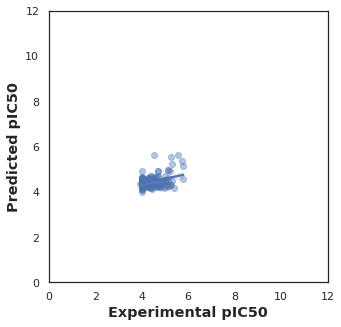

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Comparing Regressors

In [135]:
! pip install lazypredict

     |████████████████████████████████| 10.1 MB 5.0 MB/s 
     |████████████████████████████████| 269 kB 35.0 MB/s 
     |████████████████████████████████| 302 kB 44.2 MB/s 
     |████████████████████████████████| 82 kB 963 kB/s 
     |████████████████████████████████| 14.5 MB 48.7 MB/s 
     |████████████████████████████████| 1.2 MB 44.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 72 kB 725 kB/s 
     |████████████████████████████████| 127.6 MB 15 kB/s 
     |████████████████████████████████| 6.8 MB 35.9 MB/s 
     |████████████████████████████████| 248 kB 33.1 MB/s 
     |████████████████████████████████| 60 kB 5.1 MB/s 
     |████████████████████████████████| 98 kB 3.9 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=393700 sha256=2814bd85d1a230a8a218f2db21c4fff0fe5e2b127c191a0f1f27a06a15849909
  Stored in directory: /root/.cache

In [136]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

ModuleNotFoundError: ignored